In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def optical_flow(path):

    cap = cv2.VideoCapture(path) 
    ret, frame1 = cap.read()
    prev = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    hsv = np.zeros_like(frame1)
    hsv[..., 1] = 255
    while(cap.isOpened()):
        
        ret, frame = cap.read()
        if not ret or frame is None:
            break
        
        next = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        flow = cv2.calcOpticalFlowFarneback(prev, next, None, 0.5, 1, 7, 1, 5, 1.1, 0)

        mag, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])
        hsv[..., 0] = angle * 90 / np.pi
        hsv[..., 1] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)

        bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
        # plt.imshow(bgr)
        # plt.show()
        cv2.imshow('Foreground', bgr)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break


        prev = next
        # if vibe.background_samples is None:
        #     vibe.initialize_background_model(frame_gray)
        # else:
        #     foreground_mask = vibe.update_background_model(frame_gray)
        #     foreground_mask = foreground_mask.astype('uint8')
        #     cv2.imshow('Foreground', foreground_mask*255)
        #     if cv2.waitKey(1) & 0xFF == ord('q'):
        #         break

    cap.release()
    cv2.destroyAllWindows()

optical_flow('../lab3/pedestrians_input.mp4')

(240, 320, 3)


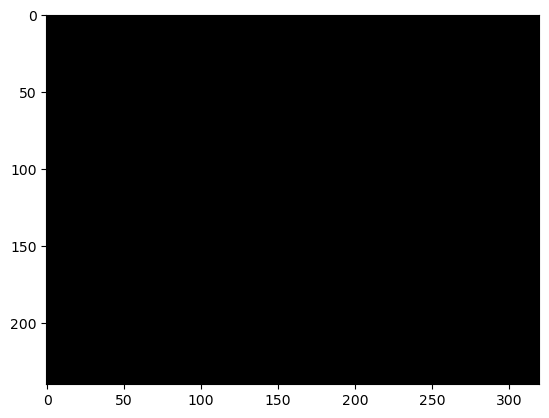

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def optical_flow(folder):
    # prev = cv2.imread(f'../lab2/{folder}/input/in001000.jpg')
    prev = cv2.imread('I.jpg')
    prev = cv2.cvtColor(prev, cv2.COLOR_BGR2GRAY)

    hsv = np.zeros((prev.shape[0], prev.shape[1], 3)).astype('uint8')
    hsv[..., 1] = 255

    # next = cv2.imread(f'../lab2/{folder}/input/in001005.jpg')
    next = cv2.imread('J.jpg')
    next = cv2.cvtColor(next, cv2.COLOR_BGR2GRAY)

    flow = cv2.calcOpticalFlowFarneback(prev, next, None, 0.5, 3, 15, 3, 5, 1.2, 0)

    mag, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    hsv[..., 0] = angle * 180 / np.pi / 2
    hsv[..., 1] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)

    print(hsv.shape)
    bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    plt.imshow(bgr)
    plt.show()


optical_flow('highway')
# def optical_flow(method, I, J):
#     pass
# def testing_methods(folder):
#     I = cv2.imread(f'{folder}/input/in001001.jpg')
#     J = cv2.imread(f'{folder}/input/in001002.jpg')

    

In [2]:
# Importing libraries
import cv2
import numpy as np
def choose_method(prvs, next, method):

    res = None
    if method == 'farneback': #szybko dziala
        res = cv2.calcOpticalFlowFarneback(prvs, next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    elif method == 'tvl1': #wolny
        optical_flow = cv2.optflow.DualTVL1OpticalFlow_create()
        res = optical_flow.calc(prvs, next, None)
    # elif method == 'pca': not found
    #     optical_flow = cv2.OpticalFlowPCAFlow()
    #     res = optical_flow.calc(prvs, next, None)
    elif method == 'dis': #ok
        optical_flow = cv2.DISOpticalFlow_create()
        res = optical_flow.calc(prvs, next, None)
    # elif method == 'simple_flow': not found
    #     optical_flow = cv2.createOptFlow_SIMPLEFlow()
    #     res = optical_flow.calc(prvs, next, None)
    elif method == 'deep_flow': #bardzo wolno
        optical_flow = cv2.optflow.createOptFlow_DeepFlow()
        res = optical_flow.calc(prvs, next, None)
    return res

def optical_flow(path, method):
    capture = cv2.VideoCapture(path)
    
    _, frame1 = capture.read()
    prvs = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)

    hsv_mask = np.zeros_like(frame1)
    hsv_mask[..., 1] = 255
    
    while(1):
        _, frame2 = capture.read()
        next = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

        flow = choose_method(prvs, next, method)
        # flow = cv2.calcOpticalFlowFarneback(prvs, next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
        mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])

        hsv_mask[..., 0] = ang * 180 / np.pi / 2
        hsv_mask[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
        rgb_representation = cv2.cvtColor(hsv_mask, cv2.COLOR_HSV2BGR)
    
        cv2.imshow('frame2', rgb_representation)
        kk = cv2.waitKey(20) & 0xff

        if kk == ord('q'):
            break 
        prvs = next
    
    capture.release()
    cv2.destroyAllWindows()
optical_flow('../lab3/pedestrians_input.mp4', 'deep_flow')

In [3]:
import numpy as np
import cv2
import argparse

cap = cv2.VideoCapture('../lab3/pedestrians_input.mp4')

# feature_params = dict( maxCorners = 1000,
#  qualityLevel = 0.3,
#  minDistance = 7,
#  blockSize = 7 )

# Parameters for lucas kanade optical flow
lk_params = dict( winSize = (15, 15),
 maxLevel = 2,
 criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
# Create some random colors
# color = np.random.randint(0, 255, (100, 3))

# Take first frame and find corners in it
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)

# p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)
# Create a mask image for drawing purposes
p0 = []
for y in range(0, old_gray.shape[0], 10):
    for x in range(0, old_gray.shape[1], 10):
        p0.append([y, x])

p0 = np.array(p0, 'float32')
p0 = p0.reshape(-1, 1, 2)
p0_orig = p0.copy()

while(1):
    ret, frame = cap.read()
    if not ret:
        print('No frames grabbed!')
        break
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # calculate optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
    # Select good points
    # if p1 is not None:
    #     good_new = p1[st==1]
    #     good_old = p0[st==1]

    img = frame
    for jj in range(len(p1)):
        if (st[jj] == 1):
            cv2.arrowedLine(img, (int(p0[jj, 0, 0]), int(p0[jj, 0, 1])), (int(p1[jj, 0, 0]), int(p1[jj, 0, 1])), (0, 0, 255))

    cv2.imshow('frame', img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
    # Now update the previous frame and previous points
    old_gray = frame_gray.copy()
    # p0 = good_new.reshape(-1, 1, 2)
    p0 = p0_orig
cv2.destroyAllWindows()

No frames grabbed!


In [16]:
import numpy as np
import cv2

cap = cv2.VideoCapture('../lab3/pedestrians_input.mp4')

lk_params = dict( winSize = (15, 15),
 maxLevel = 2,
 criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)

# hsv_mask = np.zeros((old_gray.shape[0], old_gray.shape[1], 3))
hsv_mask = np.zeros_like(old_frame)
hsv_mask[..., 1] = 255

segmenter = cv2.createBackgroundSubtractorMOG2(varThreshold=100, history=800, detectShadows=False)
# optical_flow = cv2.DISOpticalFlow_create()

while(1):
    ret, frame = cap.read()
    if not ret:
        print('No frames grabbed!')
        break
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    flow = cv2.calcOpticalFlowFarneback(old_gray, frame_gray, None, 0.5, 3, 15, 3, 5, 1.1, 0)
    # flow = optical_flow.calc(old_gray, frame_gray, None)

    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])

    hsv_mask[..., 0] = ang * 90 / np.pi
    hsv_mask[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
    rgb = cv2.cvtColor(hsv_mask, cv2.COLOR_HSV2RGB)

    binary = segmenter.apply(rgb)
    retval, labels, stats, centroids = cv2.connectedComponentsWithStats(binary)

    I_VIS = frame # copy of the input image
    if (stats.shape[0] > 1) : # are there any objects
        tab = stats [1:, 4] # 4 columns without first element
        pi = np.argmax(tab)
        pi = pi + 1 

        if stats[pi, 4] > 2000:
            cv2.rectangle(I_VIS, (stats[pi, 0], stats[pi, 1]), 
                            (stats[pi, 0] + stats[pi, 2], stats[pi, 1] + stats[pi, 3]), (255, 0, 0), 2)

            cv2.putText(I_VIS, "%f" % stats[pi, 4], (stats[pi, 0], stats[pi, 1]), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0))
            cv2.putText(I_VIS, "%d" %pi, (int(centroids[pi, 0]), int(centroids[pi, 1])), 
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0))
        cv2.imshow("I", I_VIS)

    # cv2.imshow('frame2', rgb)
    # cv2.imshow('frame', res)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
    # Now update the previous frame and previous points
    old_gray = frame_gray.copy()

cv2.destroyAllWindows()

No frames grabbed!
